In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_signs.h5 to train_signs.h5


In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops


In [0]:
dataset = h5py.File("train_signs.h5", 'r+')

In [37]:
print(dataset)

<HDF5 file "train_signs.h5" (mode r+)>


In [38]:
list(dataset.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [0]:
train_data_x = dataset['train_set_x']
train_data_y = dataset['train_set_y']
train_data_classes = dataset['list_classes']

[[[238 232 223]
  [238 232 223]
  [238 232 223]
  ...
  [222 216 209]
  [221 216 207]
  [221 216 206]]

 [[237 232 223]
  [238 232 223]
  [238 232 223]
  ...
  [222 216 209]
  [222 216 208]
  [223 217 207]]

 [[236 232 222]
  [237 232 223]
  [238 232 223]
  ...
  [222 216 209]
  [222 216 208]
  [221 216 207]]

 ...

 [[218 212 204]
  [217 212 204]
  [217 211 205]
  ...
  [214 203 194]
  [214 203 195]
  [214 204 194]]

 [[217 211 203]
  [217 211 203]
  [216 210 203]
  ...
  [214 203 194]
  [215 203 194]
  [215 204 193]]

 [[216 210 202]
  [216 210 203]
  [215 209 203]
  ...
  [214 203 194]
  [215 203 194]
  [215 204 192]]]


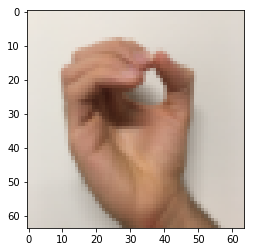

In [44]:
plt.imshow(train_data_x[1])
print(train_data_x[1])

In [45]:
print(train_data_x.shape)
print(train_data_y.shape)

(1080, 64, 64, 3)
(1080,)


In [56]:
#x_train = train_data_x/255
y_train = tf.one_hot(train_data_y, 6)
sess = tf.Session()
print(sess.run(y_train[1]))

[1. 0. 0. 0. 0. 0.]


In [0]:
dataset.close()